# Investigating the functions


In [11]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process.kernels import Matern
import matplotlib.pyplot as plt

f1_inp = np.load("./../function_3/initial_inputs.npy")
f1_out = np.load("./../function_3/initial_outputs.npy")
f1_out


f1_inp,f1_out

f1_out

array([-0.1121222 , -0.08796286, -0.11141465, -0.03483531, -0.04800758,
       -0.11062091, -0.39892551, -0.11386851, -0.13146061, -0.09418956,
       -0.04694741, -0.10596504, -0.11804826, -0.03637783, -0.05675837])

# ******************************** EDA - Analysis **********************************


In [7]:
f1_inp, f1_out

(array([[0.66579958, 0.12396913],
        [0.87779099, 0.7786275 ],
        [0.14269907, 0.34900513],
        [0.84527543, 0.71112027],
        [0.45464714, 0.29045518],
        [0.57771284, 0.77197318],
        [0.43816606, 0.68501826],
        [0.34174959, 0.02869772],
        [0.33864816, 0.21386725],
        [0.70263656, 0.9265642 ]]),
 array([ 0.53899612,  0.42058624, -0.06562362,  0.29399291,  0.21496451,
         0.02310555,  0.24461934,  0.03874902, -0.01385762,  0.61120522]))

In [2]:
from scipy.stats import skew 

pd_inp = pd.DataFrame(f1_inp)
pd_out = pd.DataFrame(f1_out, columns=["Output"])


pd_inp.describe()
pd_out.describe()

,Output
count,15.000000
mean,-0.107167
std,0.087170
min,-0.398926
25%,-0.112995
50%,-0.105965
75%,-0.052383
max,-0.034835


In [3]:
skew(f1_inp),skew(f1_out)

(array([0.45244064, 0.32402711, 1.0034146 ]), -2.6293596128236216)

(array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
        [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object),
 array([[<Axes: title={'center': 'Output'}>]], dtype=object))

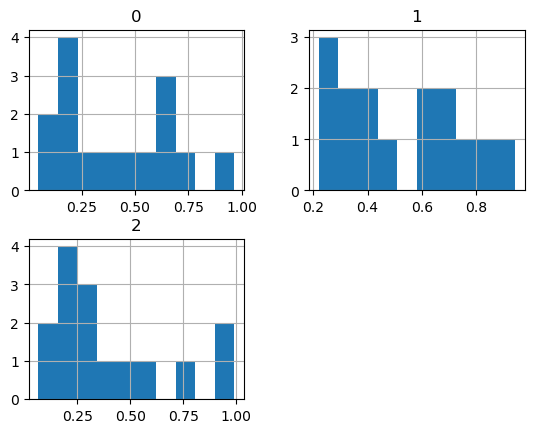

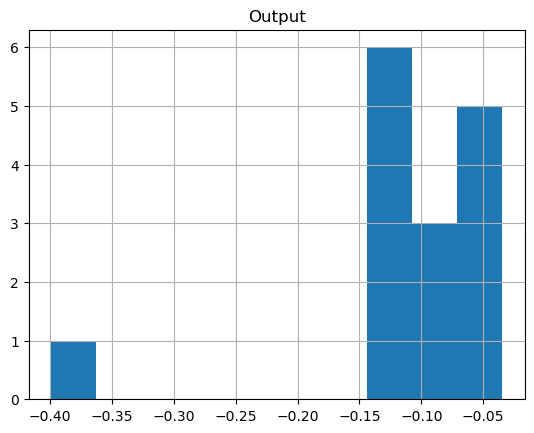

In [4]:
pd_inp.hist(), pd_out.hist()

- Interesting result above, I will check the matching inputs of this datapoint 
- [0.65011406, 0.68152635] these are the mathcing inputs that give this datapoint

<Axes: >

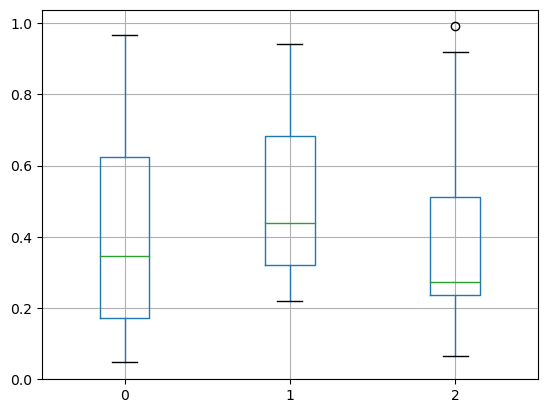

In [5]:
pd_inp.boxplot()

<Axes: >

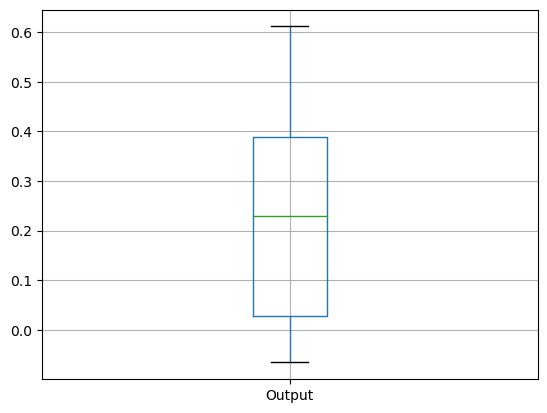

In [12]:
pd_out.boxplot()

Original DataFrame:
       Output
0  -0.112122
1  -0.087963
2  -0.111415
3  -0.034835
4  -0.048008
5  -0.110621
6  -0.398926
7  -0.113869
8  -0.131461
9  -0.094190
10 -0.046947
11 -0.105965
12 -0.118048
13 -0.036378
14 -0.056758

Filtered DataFrame (Outliers Removed):
       Output
0  -0.112122
1  -0.087963
2  -0.111415
3  -0.034835
4  -0.048008
5  -0.110621
7  -0.113869
8  -0.131461
9  -0.094190
10 -0.046947
11 -0.105965
12 -0.118048
13 -0.036378
14 -0.056758


<Axes: >

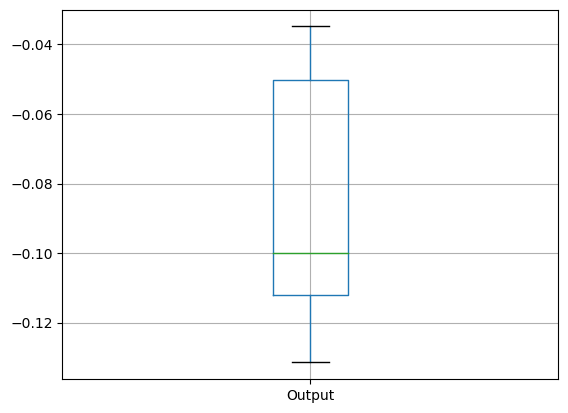

In [6]:

# Step 1: Calculate Q1, Q3, and IQR
Q1 = pd_out["Output"].quantile(0.25)  # 25th percentile
Q3 = pd_out["Output"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1                         # Interquartile range

# Step 2: Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to remove outliers
pd_out_filtered = pd_out[(pd_out["Output"] >= lower_bound) & (pd_out["Output"] <= upper_bound)]

# Print the cleaned DataFrame
print("Original DataFrame:\n", pd_out)
print("\nFiltered DataFrame (Outliers Removed):\n", pd_out_filtered)
pd_out_filtered.boxplot()

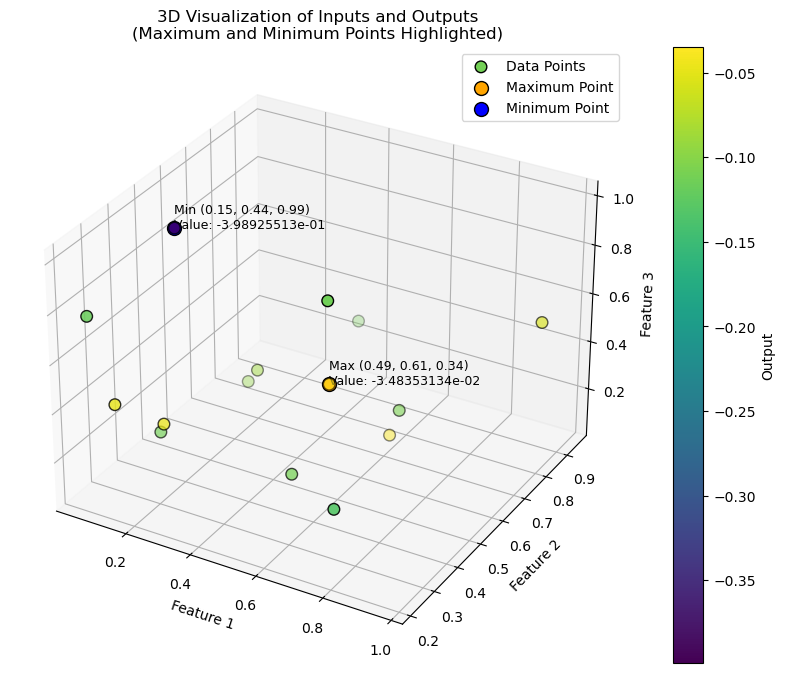

Maximum Value: -3.48353134e-02 at (x1=0.4926, x2=0.6116, x3=0.3402)
Minimum Value: -3.98925513e-01 at (x1=0.1518, x2=0.4400, x3=0.9909)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Create grid
x = f1_inp[:, 0]  # Feature 1
y = f1_inp[:, 1]  # Feature 2
z = f1_inp[:, 2]  # Feature 3
values = f1_out.ravel()  # Output values

# Create a grid for interpolation
grid_x, grid_y, grid_z = np.meshgrid(
    np.linspace(x.min(), x.max(), 50),
    np.linspace(y.min(), y.max(), 50),
    np.linspace(z.min(), z.max(), 50),
    indexing="ij"
)

# Interpolate data for visualization
interpolated_values = griddata((x, y, z), values, (grid_x, grid_y, grid_z), method='linear')

# Find max and min points
max_idx = np.argmax(values)
max_coords = (x[max_idx], y[max_idx], z[max_idx])
max_value = values[max_idx]

min_idx = np.argmin(values)
min_coords = (x[min_idx], y[min_idx], z[min_idx])
min_value = values[min_idx]

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
scatter = ax.scatter(x, y, z, c=values, cmap='viridis', s=70, edgecolor='k', label="Data Points")
plt.colorbar(scatter, ax=ax, label="Output")

# Highlight max point
ax.scatter(*max_coords, color='orange', edgecolor='black', s=100, label="Maximum Point")
ax.text(
    max_coords[0], max_coords[1], max_coords[2],
    f"Max ({max_coords[0]:.2f}, {max_coords[1]:.2f}, {max_coords[2]:.2f})\nValue: {max_value:.8e}",
    color='black', fontsize=9
)

# Highlight min point
ax.scatter(*min_coords, color='blue', edgecolor='black', s=100, label="Minimum Point")
ax.text(
    min_coords[0], min_coords[1], min_coords[2],
    f"Min ({min_coords[0]:.2f}, {min_coords[1]:.2f}, {min_coords[2]:.2f})\nValue: {min_value:.8e}",
    color='black', fontsize=9
)

# Set plot labels
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("3D Visualization of Inputs and Outputs\n(Maximum and Minimum Points Highlighted)")
ax.legend()

plt.show()

# Print the maximum and minimum values and their coordinates
print(f"Maximum Value: {max_value:.8e} at (x1={max_coords[0]:.4f}, x2={max_coords[1]:.4f}, x3={max_coords[2]:.4f})")
print(f"Minimum Value: {min_value:.8e} at (x1={min_coords[0]:.4f}, x2={min_coords[1]:.4f}, x3={min_coords[2]:.4f})")


In [9]:
max_index_out = np.argmax(f1_out)
max_index_out
max_output = f1_out[max_index_out]

max_inp = f1_inp[max_index_out]

print(f"Best score found on index {max_index_out}")
max_inp,max_output

Best score found on index 3


(array([0.49258141, 0.61159319, 0.34017639]), -0.034835313350078584)

# ***************************** Output Transformation ******************************* 
- I will use Yeo-Johnson method to hanlde the heteroscedastic nature of the data, tranform outputs, and fic asymmetric skewness. 
- Reason I am using Yeo-Johnson is because we have positive and negative values as ouput 

#### I am strugling to scale the very small values into bigger so I can efficnetly apply Yeo-Johnson
##### UPDATE:
- I will multiply each number by its corresponding exponential part in order to preserve their relationship DOES NOT WORK, THE NUMBERS WONT SAVE THEIR RELATIONSHIP
- I also tried shifitng but it did not work due to the limitations of dealing with very small numbers. 

### Aim: Scale the data, so I can apply transformation like Yeo-Johnson, and imporve skewnes and variance of the output
##### The scaled data is not a great idea, as it will normalise it between 0, 1 meaning shrinking outliers, and loosing the original variance, so we would have two alternation of the variance, possibly going too far from the original nature of the data

-Scaling does not inherently "fix" skewness unless explicitly combined with a transformation designed for this purpose.
-If the scaling method involves transformations (e.g., log, square root, or power transforms), it can reduce or change skewness by making the data more symmetric.

In [12]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Assuming f1_out is a NumPy array or a pandas Series
f1_out_transformed = PowerTransformer(method='yeo-johnson').fit_transform(f1_out.reshape(-1, 1))

# The transformed data is now stored in f1_out_transformed
f1_out, f1_out_transformed



(array([-0.1121222 , -0.08796286, -0.11141465, -0.03483531, -0.04800758,
        -0.11062091, -0.39892551, -0.11386851, -0.13146061, -0.09418956,
        -0.04694741, -0.10596504, -0.11804826, -0.03637783, -0.05675837]),
 array([[-0.49100107],
        [-0.01165121],
        [-0.47855102],
        [ 1.57226657],
        [ 1.09388181],
        [-0.46447942],
        [-2.2350453 ],
        [-0.52135676],
        [-0.79960263],
        [-0.14657628],
        [ 1.12995874],
        [-0.37965614],
        [-0.59190897],
        [ 1.51271561],
        [ 0.81100605]]))

In [ ]:
f1_out_transformed

# ************************** Input Transformation************************** 
- #### First I will use the Kumaraswammy Cumulative Distribution Function to addres:

- Non Stationary nature of the function, the way way the patter in the data changes over the unput space, example, rapidly grows in some regions and slower in some other regions 
- I will use the CDF and finds its best parameters by minimising NLML(Negative Log Marginal Likelyhood)

In [13]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C, WhiteKernel
from scipy.optimize import minimize

from sklearn.preprocessing import MinMaxScaler

# Normalize the input
scaler = MinMaxScaler()
f1_inp_normalized = scaler.fit_transform(f1_inp)
np.std(f1_inp_normalized), np.std(f1_inp)
skew(f1_inp_normalized), skew(f1_inp)
f1_inp_normalized

array([[0.13568121, 0.17187734, 0.19750205],
       [0.21247662, 0.58792901, 0.22312465],
       [0.53100985, 0.24753692, 0.11602603],
       [0.48496443, 0.54290661, 0.29637733],
       [0.09553314, 0.        , 0.42400568],
       [0.32497705, 1.        , 0.21980572],
       [0.11426163, 0.30504628, 1.        ],
       [0.65133058, 0.24565461, 0.92310656],
       [0.7616555 , 0.08909797, 0.17324004],
       [0.13454084, 0.6613349 , 0.08983715],
       [0.18901551, 0.10798919, 0.30003107],
       [0.6736447 , 0.62661661, 0.19486157],
       [0.        , 0.01586128, 0.76182322],
       [0.60193301, 0.70028924, 0.        ],
       [1.        , 0.8887782 , 0.54146211]])

In [36]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C, WhiteKernel

# Kumaraswamy warping function
def kumaraswamy_warp(x, a, b):
    x = np.clip(x, 1e-10, 1 - 1e-10)  # Avoid numerical issues
    return 1 - (1 - x**a)**b

# Normalize input data
def normalize_data(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

# Fit GP and compute NLML
def compute_nlml(X, y, a, b, kernel):
    # Apply Kumaraswamy warping
    X_warped = kumaraswamy_warp(normalize_data(X), a, b)
    
    # Gaussian Process with the given kernel
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, random_state=42)
    gp.fit(X_warped, y)
    
    # Return Negative Log Marginal Likelihood
    return -gp.log_marginal_likelihood()

# Optimize parameters a and b
def optimize_kumaraswamy(X, y):
    # Define kernel
    kernel = (
        C(1.0, (1e-10, 1e3)) * Matern(length_scale=1.0, length_scale_bounds=(1e-4, 1e3), nu=1.5)
        + WhiteKernel(noise_level=1e-2, noise_level_bounds=(1e-20, 1.0))
    )

    
    best_a, best_b, best_nlml = None, None, float("inf")
    
    # Grid search over a and b
    a_values = np.linspace(0.1, 5, 10)
    b_values = np.linspace(0.1, 5, 10)
    
    for a in a_values:
        for b in b_values:
            try:
                nlml = compute_nlml(X, y, a, b, kernel)
                if nlml < best_nlml:
                    best_a, best_b, best_nlml = a, b, nlml
            except ValueError as e:  # Handle numerical issues
                print(f"Error for a={a}, b={b}: {e}")
    
    return best_a, best_b, best_nlml

# Example Usage
#Assuming X and y are your input and output data
X_km = f1_out_transformed# Example input
y_km = f1_out # Example output
best_a, best_b, best_nlml = optimize_kumaraswamy(X_km, y_km)
print(f"Best Parameters: a={best_a}, b={best_b}, NLML={best_nlml}")


C:\Users\alerd\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\alerd\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\alerd\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\alerd\anaconda3\Lib\

Best Parameters: a=0.1, b=0.6444444444444445, NLML=-83.58854945397734


In [37]:

# Apply CDF on the normalized input using the given parameters
f1_inp_warped = kumaraswamy_warp(f1_inp_normalized, a=0.1, b=0.3444444444444445)
f1_inp, f1_inp_warped


np.var(f1_inp),skew(f1_inp), np.var(f1_inp_warped),skew(f1_inp_warped)


(0.06831771849145019,
 array([0.45244064, 0.32402711, 1.0034146 ]),
 0.04236528821098313,
 array([-0.29478   , -0.30111482, -0.04345083]))


# ***************************** Gaussian Process****************************


Log-Likelihood of the Model: -21.284081


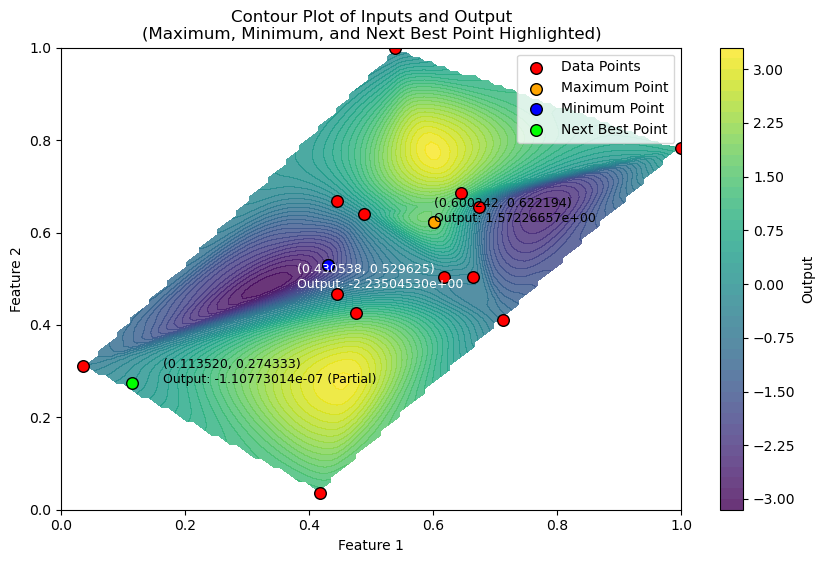

Maximum Value: 1.57226657e+00 at (x1=0.6002, x2=0.6222)
Minimum Value: -2.23504530e+00 at (x1=0.4305, x2=0.5296)
Next Best Point: -1.10773014e-07 at [0.11351985 0.27433273 0.67492153]


In [63]:
from scipy.optimize import minimize
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C, WhiteKernel

# Define the UCB acquisition function
def upper_confidence_bound(X, gp, beta=2.0):
    """
    Calculate the Upper Confidence Bound (UCB) acquisition function.
    Args:
        X (ndarray): Input points for evaluation.
        gp (GaussianProcessRegressor): Fitted GP model.
        beta (float): Exploration-exploitation trade-off parameter.
    Returns:
        UCB (ndarray): Upper confidence bound values at each input point.
    """
    mu, sigma = gp.predict(X, return_std=True)
    return mu + beta * sigma

# Optimize the UCB acquisition function
def optimize_acquisition_ucb(acquisition_func, gp, bounds, beta=2.0):
    """
    Optimize the UCB acquisition function to find the next best point.
    Args:
        acquisition_func (function): The acquisition function (UCB).
        gp (GaussianProcessRegressor): Fitted GP model.
        bounds (list): Bounds for the input space.
        beta (float): Exploration-exploitation trade-off parameter.
    Returns:
        ndarray: The next best input point.
    """
    def min_obj(X):
        return -acquisition_func(X.reshape(1, -1), gp, beta)

    res = minimize(
        fun=min_obj,
        x0=np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds]),
        bounds=bounds,
        method="L-BFGS-B"
    )
    return res.x

# Define the Gaussian Process model
def fit_gp_model(f1_inp_warped, f1_out_transformed):
    kernel = (
            C(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2), nu=1.5)
            + WhiteKernel(noise_level=1e-2, noise_level_bounds=(1e-10, 1.0))
        )
    
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
    gp.fit(f1_inp_warped, f1_out_transformed)
    return gp

# Main Workflow
# -----------------------------------------------------------------
# 3. Fit the Gaussian Process model
gp = fit_gp_model(f1_inp_warped, f1_out_transformed)

# 4. Find the next best point using UCB
bounds = [(0, 1) for _ in range(f1_inp_warped.shape[1])]
beta = 2.0  # Exploration-exploitation trade-off
next_point = optimize_acquisition_ucb(upper_confidence_bound, gp, bounds, beta=beta)

# 5. Predict the next best point's output
next_z = gp.predict(next_point.reshape(1, -1))[0]

# Test Log-Likelihood
log_likelihood = gp.log_marginal_likelihood()
print(f"Log-Likelihood of the Model: {log_likelihood:.6f}")
# -----------------------------------------------------------------

# Visualization (Separate Block)
# -----------------------------------------------------------------
# Create a grid for visualization (only for the first two features for plotting)
x = f1_inp_warped[:, 0]
y = f1_inp_warped[:, 1]
z = f1_out_transformed.ravel()

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Find the maximum and minimum points
max_idx = np.argmax(z)
max_x, max_y, max_z = f1_inp_warped[max_idx, 0], f1_inp_warped[max_idx, 1], z[max_idx]

min_idx = np.argmin(z)
min_x, min_y, min_z = f1_inp_warped[min_idx, 0], f1_inp_warped[min_idx, 1], z[min_idx]

# Plot the contour of actual outputs
plt.figure(figsize=(10, 6))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(label="Output")
s = 70

# Scatter the sampled data points
plt.scatter(f1_inp_warped[:, 0], f1_inp_warped[:, 1], color='red', label="Data Points", edgecolor='black', s=s)
plt.scatter(max_x, max_y, color='orange', edgecolor='black', s=s, label="Maximum Point")
plt.text(max_x, max_y, f"({max_x:.6f}, {max_y:.6f})\nOutput: {max_z:.8e}", color='black', fontsize=9)
plt.scatter(min_x, min_y, color='blue', edgecolor='black', s=s, label="Minimum Point")
plt.text(min_x - 0.05, min_y - 0.05, f"({min_x:.6f}, {min_y:.6f})\nOutput: {min_z:.8e}", color='white', fontsize=9)
plt.scatter(next_point[0], next_point[1], color='lime', edgecolor='black', s=s, label="Next Best Point")
plt.text(
    next_point[0] + 0.05, next_point[1],
    f"({next_point[0]:.6f}, {next_point[1]:.6f})\nOutput: {next_z:.8e} (Partial)",
    color='black',
    fontsize=9
)

# Labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Contour Plot of Inputs and Output\n(Maximum, Minimum, and Next Best Point Highlighted)")
plt.legend()
plt.show()

# Print important points
print(f"Maximum Value: {max_z:.8e} at (x1={max_x:.4f}, x2={max_y:.4f})")
print(f"Minimum Value: {min_z:.8e} at (x1={min_x:.4f}, x2={min_y:.4f})")
print(f"Next Best Point: {next_z:.8e} at {next_point}")
# -----------------------------------------------------------------


In [48]:
# Calculate residuals
residuals = f1_out_transformed - gp.predict(f1_inp_warped)

# Print residual statistics
print(f"Mean Residual: {np.mean(residuals):.10f}")
print(f"Residual Standard Deviation: {np.std(residuals):.10f}")


Mean Residual: -0.0000002127
Residual Standard Deviation: 1.0000403733
